## Домашнее задание<a class='anchor' id='hw'>

1. Обучить любую модель классификации на датасете IRIS до применения PCA (2 компоненты) и после него. Сравнить качество классификации по отложенной выборке.
2. *Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции [numpy.linalg.svd()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html)

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

In [3]:
def standard_scale(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res

In [4]:
X = X.astype(float)

X = standard_scale(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)

In [6]:
X_train.shape

(105, 4)

In [7]:
def pca(X):
    covariance_matrix = X.T @ X
    
    eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

    # сформируем список кортежей (собственное значение, собственный вектор)
    eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

    # и отсортируем список по убыванию собственных значений
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    
    # Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
    W = np.hstack([eig_pairs[i][1].reshape(4,1) for i in range(2)])

    return X.dot(W)

In [8]:
# Преобразование

Z = pca(X)

In [9]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [10]:
pure_answers = model.predict(X_test)

In [11]:
# Результат работы до PCA

pure_score = model.score(X_test, y_test)
pure_score

0.9555555555555556

In [12]:
Z_train, Z_test, zy_train, zy_test = train_test_split(Z, 
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)

In [13]:
model_pca = model

model_pca.fit(Z_train, zy_train)
pca_answers = model_pca.predict(Z_test)

# Результат работы после преобразования X с помощью PCA
pca_score = model_pca.score(Z_test, zy_test)
pca_score

0.9111111111111111

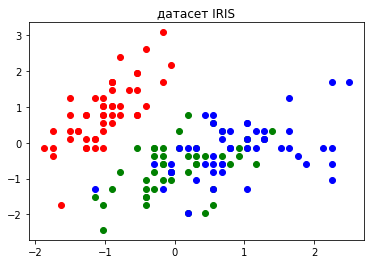

In [16]:
plt.figure()
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=c)
plt.title('датасет IRIS')
plt.show()

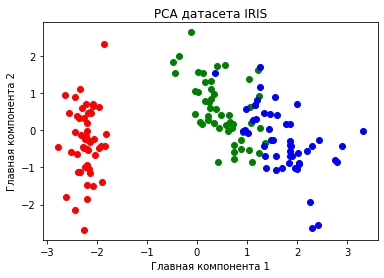

In [15]:
plt.figure()
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y == i, 0], Z[y == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()